In [20]:
# 1. Các thư viện cần thiết
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

In [21]:
# 2. Đọc file csv
company_csv = 'PUM.DE.csv'
data = pd.read_csv(company_csv)
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,36.500000,36.500000,35.450001,36.000000,33.372738,39880.0
1,2018-01-03,35.950001,36.700001,35.950001,36.250000,33.604492,39480.0
2,2018-01-04,36.549999,36.599998,36.250000,36.250000,33.604492,48160.0
3,2018-01-05,36.349998,36.599998,36.250000,36.349998,33.697193,58480.0
4,2018-01-08,36.299999,36.349998,36.099998,36.150002,33.511787,32910.0
...,...,...,...,...,...,...,...
1478,2023-10-25,54.060001,54.919998,53.439999,54.919998,54.919998,515989.0
1479,2023-10-26,53.299999,54.439999,53.240002,53.299999,53.299999,443965.0
1480,2023-10-27,53.259998,53.480000,52.580002,52.939999,52.939999,327461.0
1481,2023-10-30,53.040001,53.580002,52.700001,52.939999,52.939999,140056.0


In [22]:
#3. Chọn các cột cần thiết
df = pd.read_csv(company_csv)
df = df[['Date','Close']]
df['Date'] = pd.to_datetime(df['Date'])
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

In [23]:
#4. Đọc file dữ liệu chứng khoán AAPL và chia train test validate theo tỉ lệ 7:3
train_size = int(0.7 * len(df))
test_size = int(0.3 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

In [24]:
#Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

# Tìm số k phù hợp
best_k = None
best_rmse = float('inf')

for k in range(1, 21):
    #5. Xây dựng mô hình KNN
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(x_train, y_train)

    # Dự đoán giá trị cho tập xác thực
    x_val = np.array(val_data.index).reshape(-1, 1)
    y_val = np.array(val_data['Close'])
    y_pred_val = model.predict(x_val)

    # Tính toán RMSE
    rmse = np.sqrt(mean_squared_error(y_val, y_pred_val))
    # In số k và RMSE
    print(f"Number of neighbors: {k}, RMSE: {rmse}")

    # Lưu lại số k và RMSE tốt nhất
    if rmse < best_rmse:
        best_k = k
        best_rmse = rmse

#6. Xây dựng mô hình KNN với số láng giềng tốt nhất
model = KNeighborsRegressor(n_neighbors=best_k)
model.fit(x_train, y_train)

# Dự đoán giá trị cho tập kiểm tra
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
y_pred = model.predict(x_test)

# In số k và RMSE tốt nhất
print('Best k:', best_k)
print('Best RMSE:', best_rmse)

Number of neighbors: 1, RMSE: 41.780002999999994
Number of neighbors: 2, RMSE: 41.34000049999999
Number of neighbors: 3, RMSE: 40.44000133333333
Number of neighbors: 4, RMSE: 40.1400015
Number of neighbors: 5, RMSE: 39.85600079999999
Number of neighbors: 6, RMSE: 39.430000500000006
Number of neighbors: 7, RMSE: 39.23428642857144
Number of neighbors: 8, RMSE: 39.39250112500001
Number of neighbors: 9, RMSE: 39.70666744444445
Number of neighbors: 10, RMSE: 39.8420009
Number of neighbors: 11, RMSE: 39.860000545454554
Number of neighbors: 12, RMSE: 39.90666733333333
Number of neighbors: 13, RMSE: 39.903077923076935
Number of neighbors: 14, RMSE: 40.090001
Number of neighbors: 15, RMSE: 40.376001
Number of neighbors: 16, RMSE: 40.671251125
Number of neighbors: 17, RMSE: 40.85882488235295
Number of neighbors: 18, RMSE: 41.18889011111111
Number of neighbors: 19, RMSE: 41.62368542105263
Number of neighbors: 20, RMSE: 42.26750135
Best k: 7
Best RMSE: 39.23428642857144


In [25]:
#7. Tính MAE, RMSE, MSE, R-square cho testing
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
# MSE
def calculate_mse(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)
mse = mean_squared_error(y_test, y_pred)
# Tính MAE, RMSE, R-square cho testing
mae_test = mean_absolute_error(y_test, y_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))
mse_test = calculate_mse(y_test, y_pred)
r_squared_test = r2_score(y_test, y_pred)

# Tính MAE, RMSE,MSE cho validation
mae_val = mean_absolute_error(y_val, y_pred_val)
rmse_val = np.sqrt(mean_squared_error(y_val, y_pred_val))
mse_val = calculate_mse(y_val, y_pred_val)
r_squared_val = r2_score(y_val, y_pred_val)
# In kết quả
print('---------VALIDATE----------')
print("MAE:", round(mae_val, 3))
print("RMSE:", round(rmse_val, 3))
print("MSE:", round(mse_val, 3))
print("R-squared:", round(r_squared_val, 3))
print('--------------------------')
print('---------TEST----------')
print("MAE:", round(mae_test, 3))
print("RMSE:", round(rmse_test, 3))
print("MSE:", round(mse_test, 3))
print("R-squared:", round(r_squared_test, 3))
print('-------------------')

---------VALIDATE----------
MAE: 42.268
RMSE: 42.268
MSE: 1786.542
R-squared: nan
--------------------------
---------TEST----------
MAE: 32.093
RMSE: 33.635
MSE: 1131.315
R-squared: -10.079
-------------------


C:\Users\trant\New folder\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


In [26]:
#8. Dự đoán giá trị cho 30 ngày tiếp theo
last_index = df.index[-1]
last_data = pd.date_range(start=df['Date'].iloc[-1], periods=30, freq='D')
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)
y_next_30_days = model.predict(x_next_30_days)
print(y_next_30_days)

[92.53428543 92.53428543 92.53428543 92.53428543 92.53428543 92.53428543
 92.53428543 92.53428543 92.53428543 92.53428543 92.53428543 92.53428543
 92.53428543 92.53428543 92.53428543 92.53428543 92.53428543 92.53428543
 92.53428543 92.53428543 92.53428543 92.53428543 92.53428543 92.53428543
 92.53428543 92.53428543 92.53428543 92.53428543 92.53428543 92.53428543]


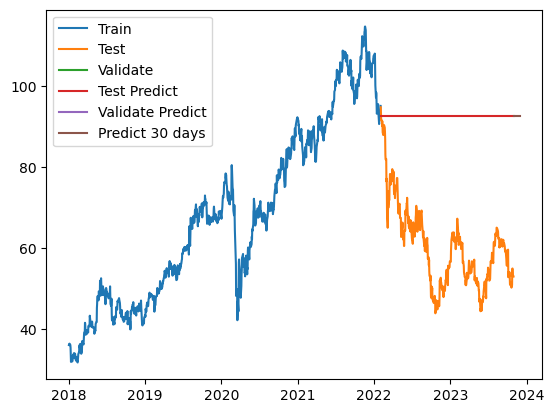

In [27]:
#9. Vẽ đồ thị
fig, ax = plt.subplots()
ax.plot(train_data['Date'], train_data['Close'])
ax.plot(test_data['Date'], test_data['Close'])
ax.plot(val_data['Date'], val_data['Close'])
ax.plot(test_data['Date'], y_pred)
ax.plot(val_data['Date'], y_pred_val)
ax.plot(last_data,y_next_30_days)
ax.legend(['Train', 'Test', 'Validate', 'Test Predict', 'Validate Predict','Predict 30 days'])